<a href="https://colab.research.google.com/github/victorbuenog/Flapper/blob/main/Policy_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/victorbuenog/Flapper.git

fatal: destination path 'Flapper' already exists and is not an empty directory.


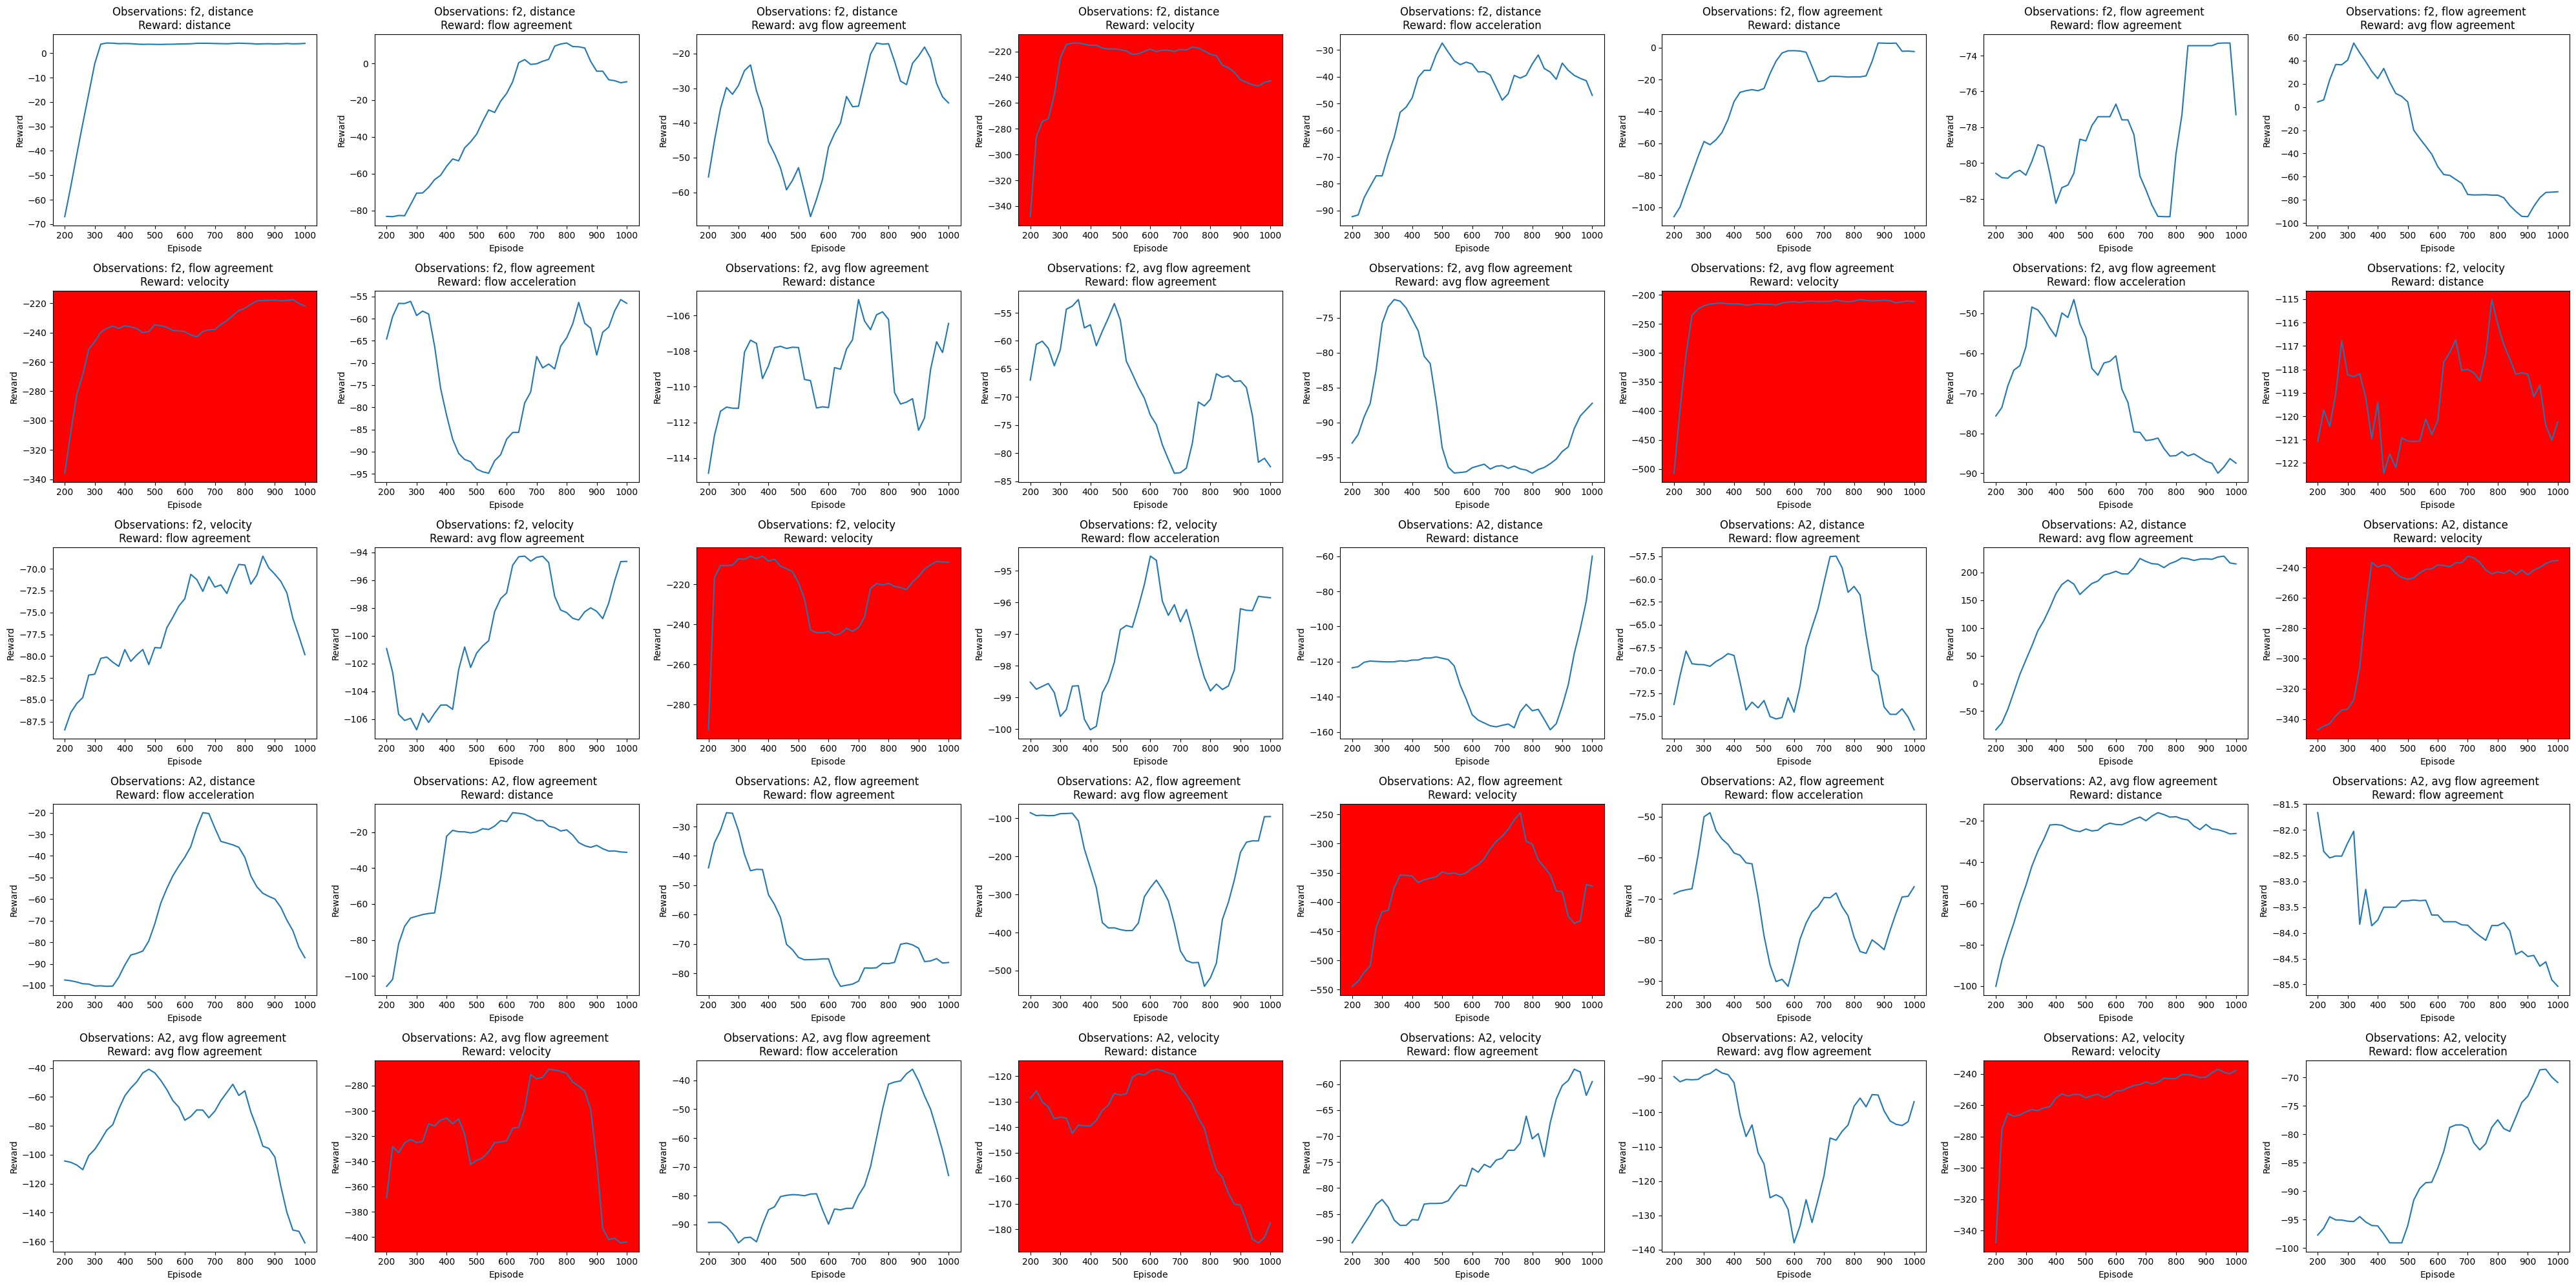

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

obs_action = ['f2','A2']
obs_flow = ['distance', 'flow agreement', 'avg flow agreement', 'velocity']
rewards = ['distance', 'flow agreement', 'avg flow agreement', 'velocity', 'flow acceleration']

fig, axes = plt.subplots(5, 8, figsize=(40, 20)) # Create a 5x8 grid of subplots

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Keep track of the current subplot index
subplot_index = 0

for obs1 in obs_action:
    for obs2 in obs_flow:
        for reward in rewards:
            df = pd.read_csv(f"/content/Flapper/Logs/log_PPO_Flappers_ACT_{obs1}_OBS_['{obs1}', '{obs2}']_REW_['{reward}'].csv")

            # Plot on the current subplot
            axes[subplot_index].plot(df["Episode"], df["reward"].rolling(10).mean())
            axes[subplot_index].set_xlabel('Episode')
            axes[subplot_index].set_ylabel('Reward')
            axes[subplot_index].set_title(f'Observations: {obs1}, {obs2} \nReward: {reward}')

            if df["reward"].max() < -100:
                axes[subplot_index].set_facecolor('red')

            # Move to the next subplot
            subplot_index += 1

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()